<a href="https://colab.research.google.com/github/yashaspm01/Deep_learning_vein_detection-/blob/main/DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📤 Please upload the stored vein image first:


Saving index_2.bmp to index_2.bmp
📤 Now upload the authentication image:


Saving index_2 (1).bmp to index_2 (1).bmp
🔄 Training the Siamese Network (simulated data)...
Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 466ms/step - accuracy: 0.0000e+00 - loss: 0.7907 - val_accuracy: 0.0000e+00 - val_loss: 0.6802
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.3389 - loss: 5.9248 - val_accuracy: 0.0000e+00 - val_loss: 0.6754
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.0000e+00 - loss: 7.7359 - val_accuracy: 0.0000e+00 - val_loss: 0.7111
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.0000e+00 - loss: 7.6114 - val_accuracy: 0.0000e+00 - val_loss: 0.7731
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.0000e+00 - loss: 7.6944 - val_accuracy: 0.0000e+00 - val_loss: 0.8633
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 8.8292 - val_accuracy: 0.0000e+00 - val_loss: 1.5384
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0000e+00 - loss: 8.0127 - val_accuracy: 0.0000e+0

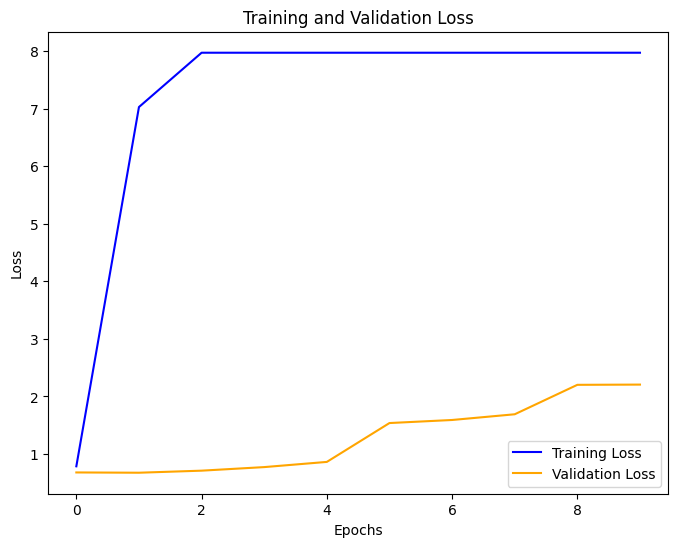

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


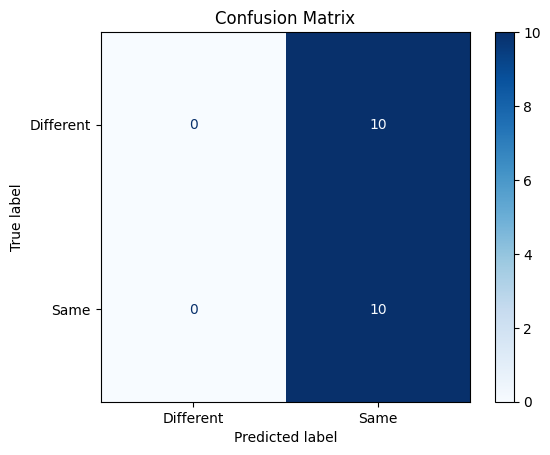

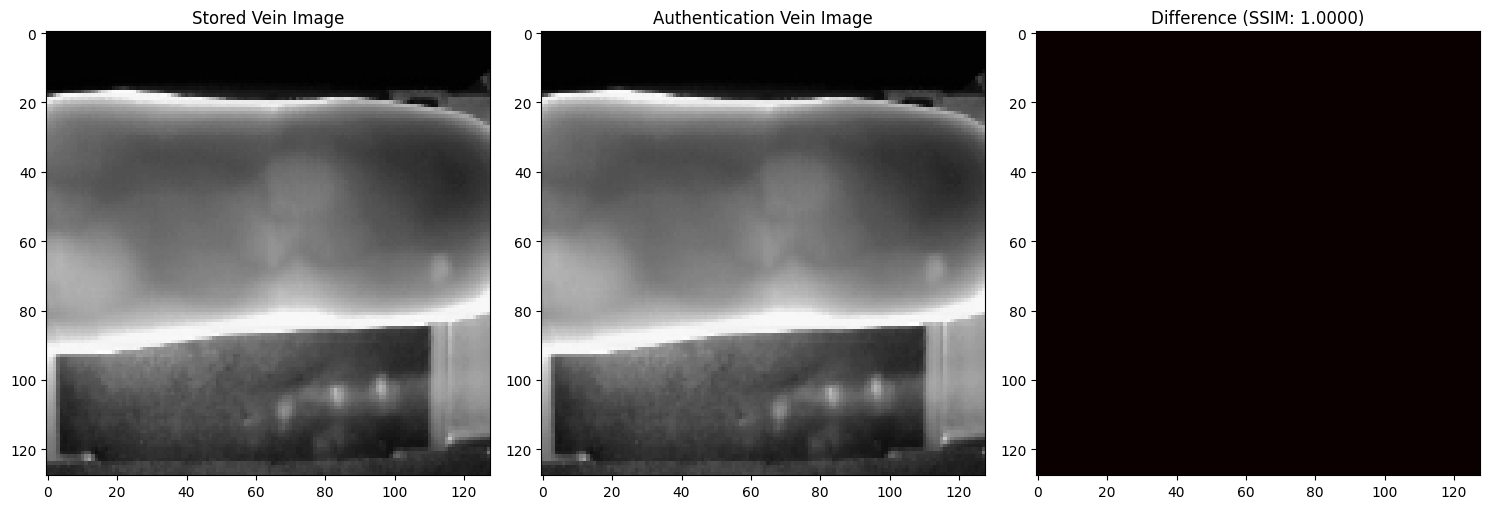

SSIM Score (Similarity): 1.0000
✅ The images belong to the same person.


In [5]:
# --- Step 1: Import Required Libraries ---
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from google.colab import files
from skimage.metrics import structural_similarity as compare_ssim

# --- Step 2: Image Upload and Storage ---
print("📤 Please upload the stored vein image first:")
uploaded_stored = files.upload()  # Upload stored image (reference)
stored_image_path = list(uploaded_stored.keys())[0]

print("📤 Now upload the authentication image:")
uploaded_auth = files.upload()  # Upload authentication image
auth_image_path = list(uploaded_auth.keys())[0]

# --- Step 3: Image Preprocessing ---
def preprocess_image(image_path, target_size=(128, 128)):
    """Load, resize, normalize, and reshape an image."""
    if not os.path.exists(image_path):
        print(f"⚠️ Error: File not found - {image_path}")
        return None

    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"⚠️ Error: Unable to read image - {image_path}")
        return None

    img = cv2.resize(img, target_size)  # Resize to 128x128
    img = img / 255.0  # Normalize pixel values
    return img.reshape(128, 128, 1)  # Reshape for model input

# Preprocess images
stored_image = preprocess_image(stored_image_path)
auth_image = preprocess_image(auth_image_path)

if stored_image is None or auth_image is None:
    raise ValueError("⚠️ Error: One or both images are missing or could not be loaded!")

# --- Step 4: Define Siamese Network for Vein Authentication ---
input_shape = (128, 128, 1)

def create_siamese_network():
    """Build the Siamese Network Model."""
    input_img = Input(shape=input_shape)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Flatten()(x)
    encoded = Dense(128, activation='relu')(x)

    return Model(input_img, encoded)

# Create model
encoder_model = create_siamese_network()

# Siamese Network Inputs
input_a = Input(shape=input_shape)
input_b = Input(shape=input_shape)

# Encode both images
encoded_a = encoder_model(input_a)
encoded_b = encoder_model(input_b)

# Compute distance
distance = Lambda(lambda x: tf.sqrt(tf.reduce_sum(tf.square(x[0] - x[1]), axis=-1)))([encoded_a, encoded_b])

# Build Siamese Model
siamese_net = Model(inputs=[input_a, input_b], outputs=distance)

# Compile Model
siamese_net.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

# --- Step 5: Train the Model on a Large Dataset (Simulated) ---
print("🔄 Training the Siamese Network (simulated data)...")
X1 = np.random.rand(100, 128, 128, 1)
X2 = np.random.rand(100, 128, 128, 1)
y = np.random.randint(0, 2, size=(100,))

history = siamese_net.fit([X1, X2], y, epochs=10, batch_size=16, validation_split=0.2)

# --- Step 6: Authenticate User ---
print("🔍 Performing authentication...")

# Reshape images for prediction
stored_image = np.expand_dims(stored_image, axis=0)
auth_image = np.expand_dims(auth_image, axis=0)

# Predict similarity score
similarity_score = siamese_net.predict([stored_image, auth_image])[0]

# Authentication Decision
print(f"🟢 Similarity Score: {similarity_score:.4f}")
if similarity_score < 0.5:
    print("✅ Authentication Successful! Vein matches the stored record.")
else:
    print("❌ Authentication Failed! Vein does not match.")

# --- Step 7: Visualization ---

# 1️⃣ **Plot Training and Validation Loss**
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# 2️⃣ **Confusion Matrix**
test_X1 = np.random.rand(20, 128, 128, 1)
test_X2 = np.random.rand(20, 128, 128, 1)
test_y = np.random.randint(0, 2, size=(20,))

predictions = siamese_net.predict([test_X1, test_X2]).reshape(-1)
predictions_binary = (predictions > 0.5).astype(int)

conf_matrix = confusion_matrix(test_y, predictions_binary)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Different", "Same"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# 3️⃣ **Display the Vein Images and Compare**
def display_images(image1_path, image2_path):
    """Displays stored and authentication vein images along with difference."""
    img1 = cv2.imread(image1_path, cv2.IMREAD_GRAYSCALE)
    img2 = cv2.imread(image2_path, cv2.IMREAD_GRAYSCALE)

    img1 = cv2.resize(img1, (128, 128))
    img2 = cv2.resize(img2, (128, 128))

    ssim_score, diff = compare_ssim(img1, img2, full=True)
    diff = (diff * 255).astype("uint8")
    thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 1)
    plt.title("Stored Vein Image")
    plt.imshow(img1, cmap='gray')

    plt.subplot(1, 3, 2)
    plt.title("Authentication Vein Image")
    plt.imshow(img2, cmap='gray')

    plt.subplot(1, 3, 3)
    plt.title(f"Difference (SSIM: {ssim_score:.4f})")
    plt.imshow(thresh, cmap='hot')

    plt.tight_layout()
    plt.show()

    print(f"SSIM Score (Similarity): {ssim_score:.4f}")
    if ssim_score < 1.0:
        print("❌ The images belong to different individuals.")
    else:
        print("✅ The images belong to the same person.")

display_images(stored_image_path, auth_image_path)
